In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_csv('https://pedromeerholz-churn-ml.s3.sa-east-1.amazonaws.com/Churn_Modelling.csv')
df.shape

(10000, 14)

# Análise de Dados

## Informações básicas

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.drop(['RowNumber'], axis=1, inplace=True)

In [5]:
df.columns

Index(['CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender', 'Age',
       'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
churn_df = df[df['Exited'] == 1]
churn_df.drop('CustomerId', axis=1, inplace=True)
churn_df.shape

/tmp/ipykernel_20355/2136387196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  churn_df.drop('CustomerId', axis=1, inplace=True)


(2037, 12)

In [11]:
no_churn_df = df[df['Exited'] == 0]
no_churn_df.drop('CustomerId', axis=1, inplace=True)
no_churn_df.shape

/tmp/ipykernel_20355/3771563722.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  no_churn_df.drop('CustomerId', axis=1, inplace=True)


(7963, 12)

## Funções

In [123]:
def countplot(title, data, x, hue):
    plt.figure(figsize=(10, 5))
    plt.title(title)
    sns.countplot(data=data, x=x, hue=hue)
    plt.ylabel('Quantidade de churns')
    plt.show()
    plt.close()

In [126]:
def chi2(data, column, alpha=0.05):
    crosstab = pd.crosstab(data[column], data['Exited'])
    chi_scores = stats.chi2_contingency(crosstab)
    chi2 = chi_scores[0]
    pvalue = chi_scores[1]

    chi2_df = {'Qui2': [chi2], 'p-value': [pvalue], 'hypotesis': 'H1' if pvalue < alpha else 'H0'}
    chi2_df = pd.DataFrame(chi2_df)
    chi2_df.index = [column]
    return chi2_df

In [127]:
def t_test(data, column, alpha=0.05):
    no_churn = data[data['Exited'] == 0][column]
    churn = data[data['Exited'] == 1][column]

    ttest_scores = stats.ttest_ind(no_churn, churn)
    statistics = ttest_scores[0]
    pvalue = ttest_scores[1]

    ttest_df = {'statistics': [statistics], 'p-value': [pvalue], 'hypotesis': 'H1' if pvalue < alpha else 'H0'}
    ttest_df = pd.DataFrame(ttest_df)
    ttest_df.index = [column]
    return ttest_df

## Categoria 1: Análise Demográfica

Pergunta 1: Algum gênero tem uma maior tendência a cancelar os serviços?

Pergunta 2: A diferença de churns entre os gêneros, é significativa?

Pergunta 3: Alguma faixa de idade tem uma maior tendência a cancelar os serviços?

Pergunta 4: A diferença de churns entre as faixas etárias, é significativa?

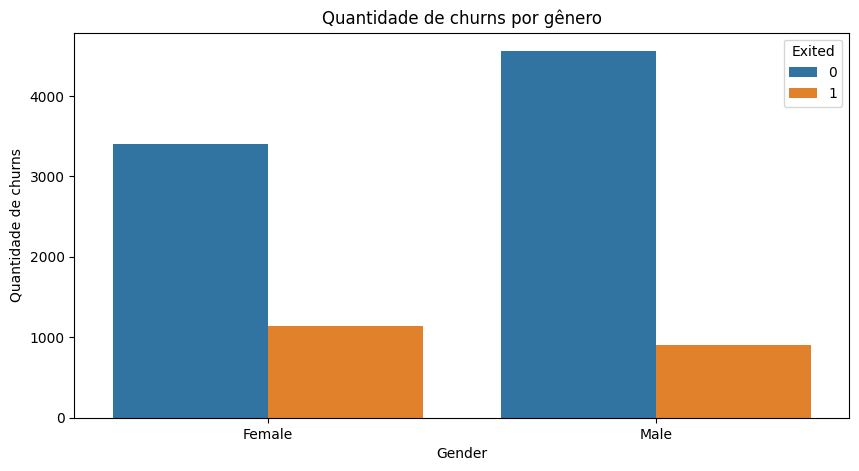

In [124]:
# Pergunta 1: Algum gênero tem uma maior tendência a cancelar os serviços?
countplot('Quantidade de churns por gênero', df, 'Gender', 'Exited')

In [104]:
# Pergunta 2: A diferença de churns entre os gêneros, é significativa?
# H0: Não existe associação entre Gênero e Churn
# H1: Existe associação entre Gênero e Churn

chi2(df, 'Gender')

,Qui2,p-value,hypotesis
Gender,112.918571,2.248210e-26,H1


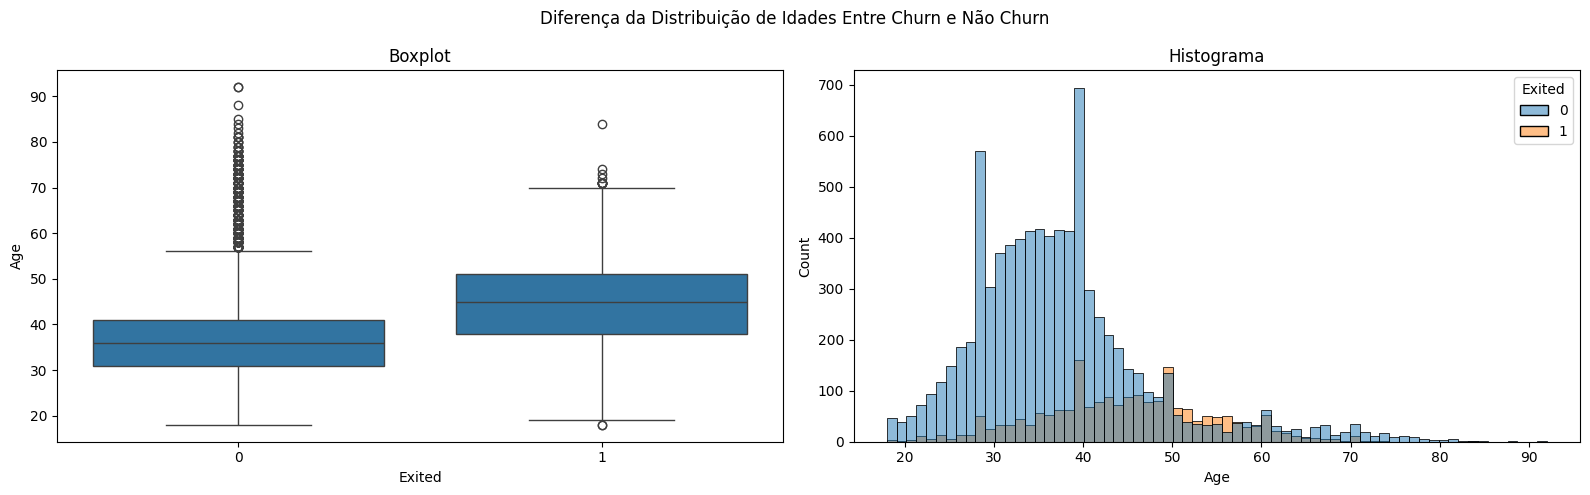

In [119]:
# Pergunta 3: Alguma faixa de idade tem uma maior tendência a cancelar os serviços?
fig, axes = plt.subplots(1, 2, figsize=(16, 5))
fig.suptitle('Diferença da Distribuição de Idades Entre Churn e Não Churn')

# Boxplot
sns.boxplot(data=df, x='Exited', y='Age', ax=axes[0])
axes[0].set_title('Boxplot')

# Histplot
sns.histplot(data=df, x='Age', hue='Exited', ax=axes[1])
axes[1].set_title('Histograma')

plt.tight_layout()
plt.show()
plt.close()

In [112]:
# Pergunta 4: A diferença de churns entre as faixas etárias, é significativa?
# H0: Não existe diferença significativa entre as médias de idade dos clientes que deram e que não deram churn
# H1: Existe diferença significativa entre as médias de idade dos clientes que deram e que não deram churn

t_test(df, 'Age')

,statistics,p-value,hypotesis
Age,-29.766815,1.239931e-186,H1


## Categoria 2: Análise Geográfica e de Produto

Pergunta 1: Qual região possui mais churn? 

Pergunta 2: A diferença de churns entre as regiões, é significativa?

Pergunta 3: Os clientes que deram churn possuiam cartão de crédito?

Pergunta 4: A diferença de churns entre clientes que tinham ou não cartão de crédito, é significativa?

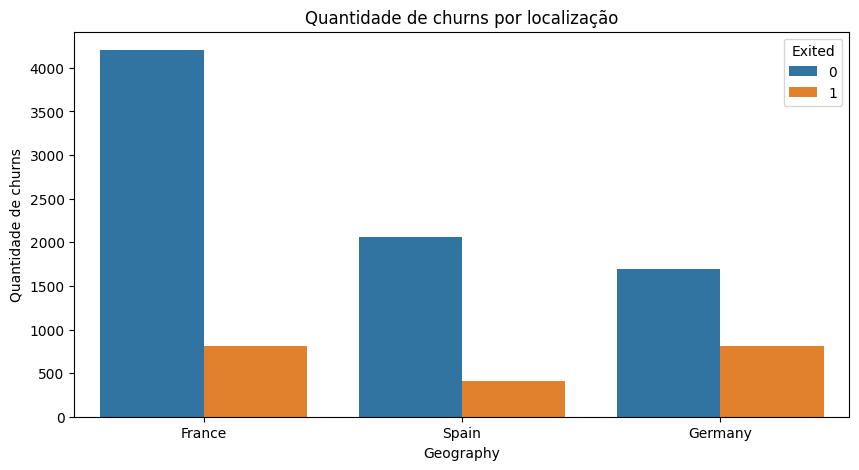

In [125]:
# Pergunta 1: Qual região possui mais churn
countplot('Quantidade de churns por localização', df, 'Geography', 'Exited')

In [ ]:
# Pergunta 2: A diferença de churns entre as regiões, é significativa?
# H0 (Hipótese nula): Não existe associação entre Localização e Churn
# H1: Existe associação entre Localização e Churn

chi2(df, 'Geography', alpha=0.05)

,Qui2,p-value,hypotesis
Geography,301.255337,3.830318e-66,H1


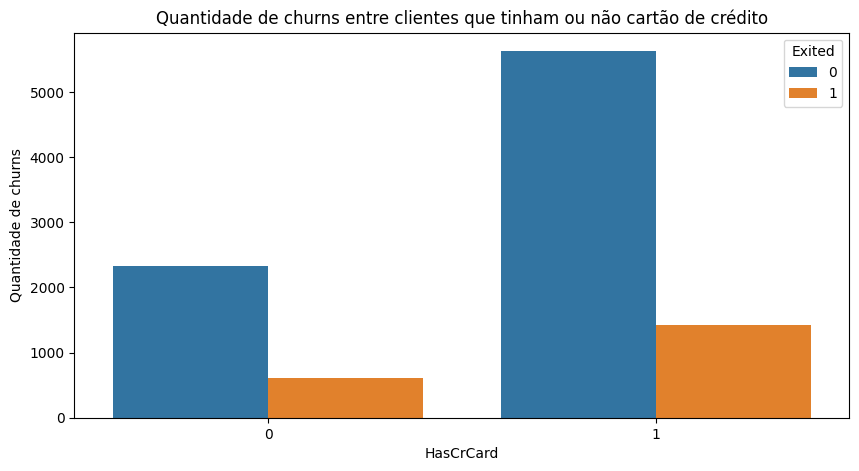

In [131]:
# Pergunta 3: Os clientes que deram churn possuiam cartão de crédito?
countplot('Quantidade de churns entre clientes que tinham ou não cartão de crédito', df, 'HasCrCard', 'Exited')

In [132]:
# Pergunta 4: A diferença de churns entre clientes que tinham ou não cartão de crédito, é significativa?
# H0 (Hipótese nula): Não existe associação entre Localização e Churn
# H1: Existe associação entre Localização e Churn

chi2(df, 'HasCrCard', alpha=0.05)

,Qui2,p-value,hypotesis
HasCrCard,0.471338,0.492372,H0


## Categoria 3: Análise Comportamental e de Uso

Pergunta 1: Os clientes que deram churn tinham quanto tempo de contrato, em média?

Pergunta 2: Os clientes que deram churn tinham um bom score de crédito?

Pergunta 3: A média do score de clientes que deram ou não churn, possui diferença significativa?

Pergunta 4: Os clientes que deram churn haviam contratado quantos serviços, em média?

Pergunta 5: A média de serviços contratados entre clientes que deram ou não churn, possui diferença significativa?

In [133]:
# Pergunta 1: Os clientes que deram churn tinham quanto tempo de contrato, em média?


In [ ]:
# Pergunta 2: Os clientes que deram churn tinham um bom score de crédito?



In [ ]:
# Pergunta 3: A média do score de clientes que deram ou não churn, possui diferença significativa?



In [ ]:
# Pergunta 4: Os clientes que deram churn haviam contratado quantos serviços, em média?


In [ ]:
# Pergunta 5: A média de serviços contratados entre clientes que deram ou não churn, possui diferença significativa?


## Categoria 4: Qualidade dos Dados

Pergunta 1: Os dados possuem outliers?

Pergunta 2: O conjunto de dados é balanceado? Qual a proporção das classes?

In [45]:
def boxplot(df, column, title_posfix):
    plt.figure(figsize=(10, 5))
    plt.title(f'Boxplot {column} - {title_posfix}')
    sns.boxplot(x=df[column])
    plt.xlabel(column)
    plt.show()
    plt.close()

### Pergunta 1: Os dados dos clientes que não deram churn, possuem outliers?

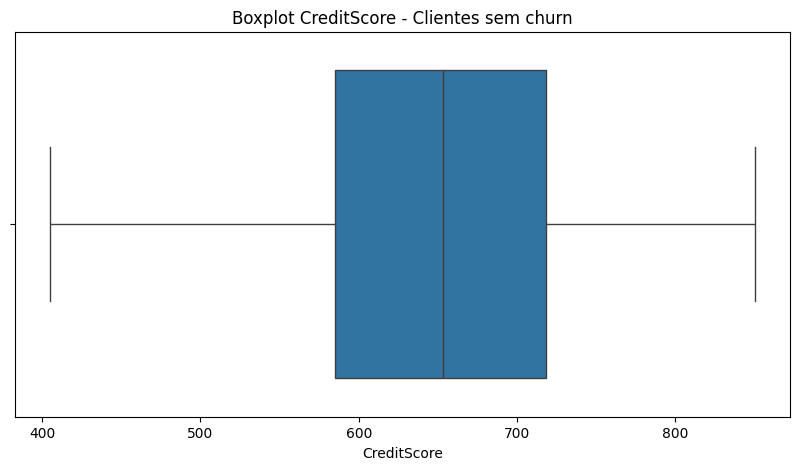

In [46]:
boxplot(no_churn_df, 'CreditScore', 'Clientes sem churn')

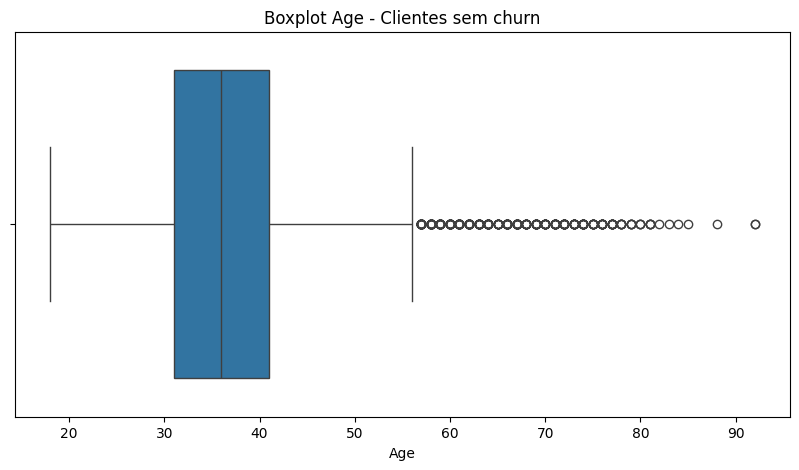

In [47]:
boxplot(no_churn_df, 'Age', 'Clientes sem churn')

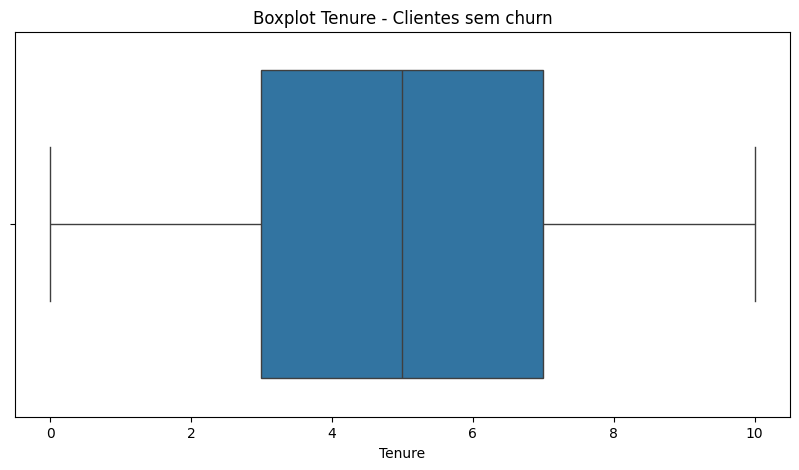

In [48]:
boxplot(no_churn_df, 'Tenure', 'Clientes sem churn')

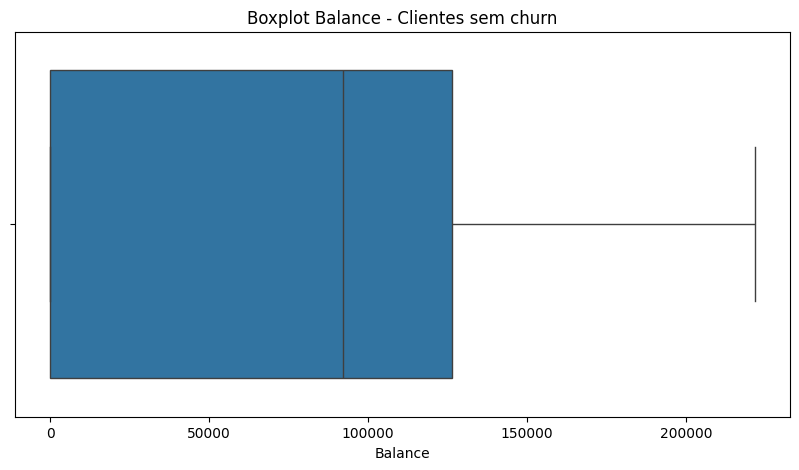

In [49]:
boxplot(no_churn_df, 'Balance', 'Clientes sem churn')

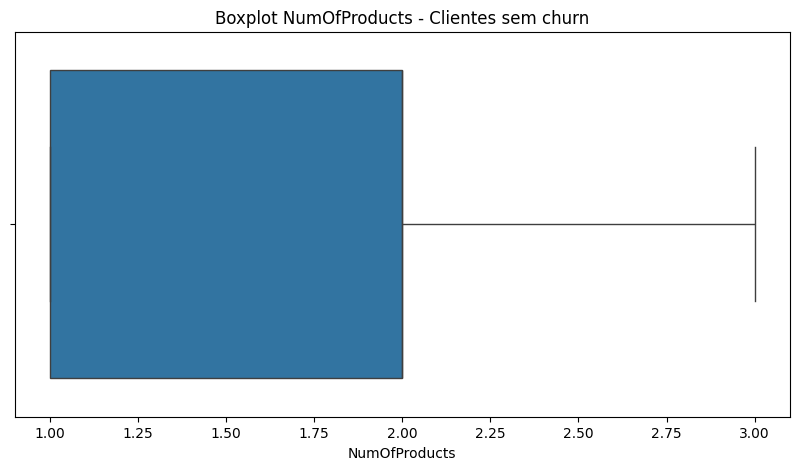

In [50]:
boxplot(no_churn_df, 'NumOfProducts', 'Clientes sem churn')

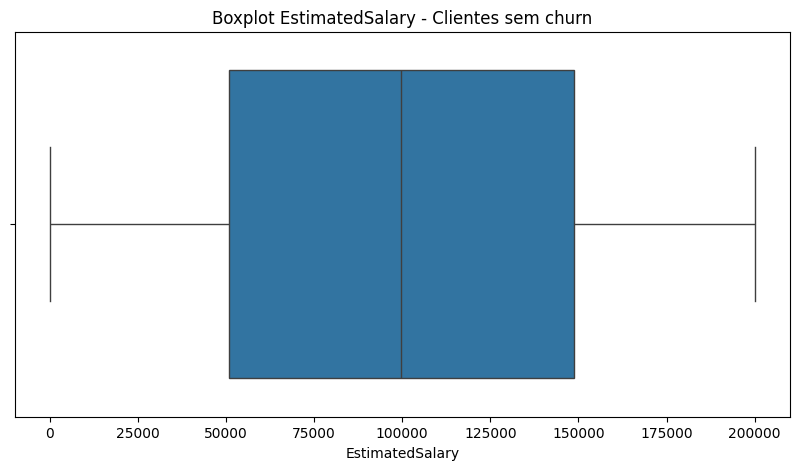

In [51]:
boxplot(no_churn_df, 'EstimatedSalary', 'Clientes sem churn')

### Pergunta 1: Os dados dos clientes que deram churn, possuem outliers?

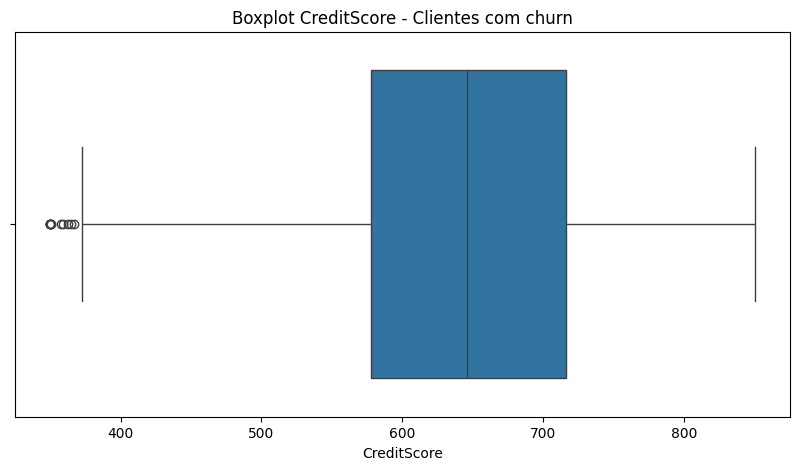

In [52]:
boxplot(churn_df, 'CreditScore', 'Clientes com churn')

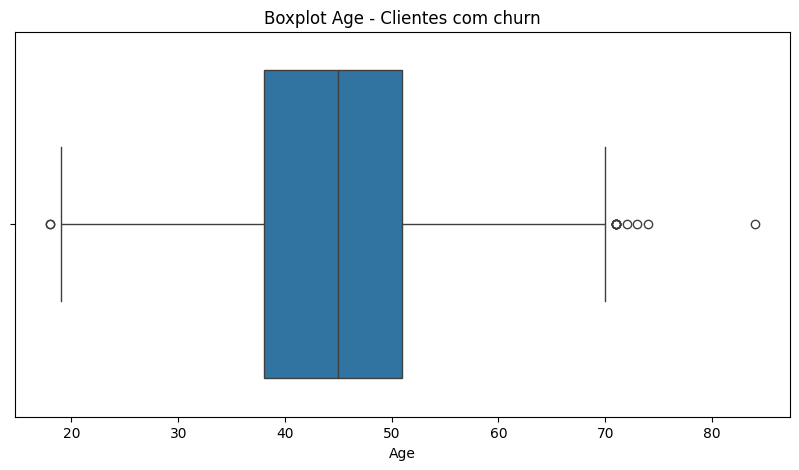

In [53]:
boxplot(churn_df, 'Age', 'Clientes com churn')

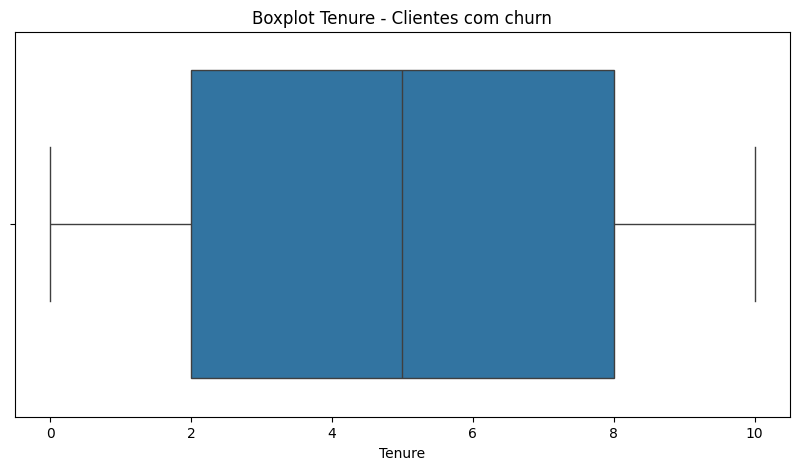

In [54]:
boxplot(churn_df, 'Tenure', 'Clientes com churn')

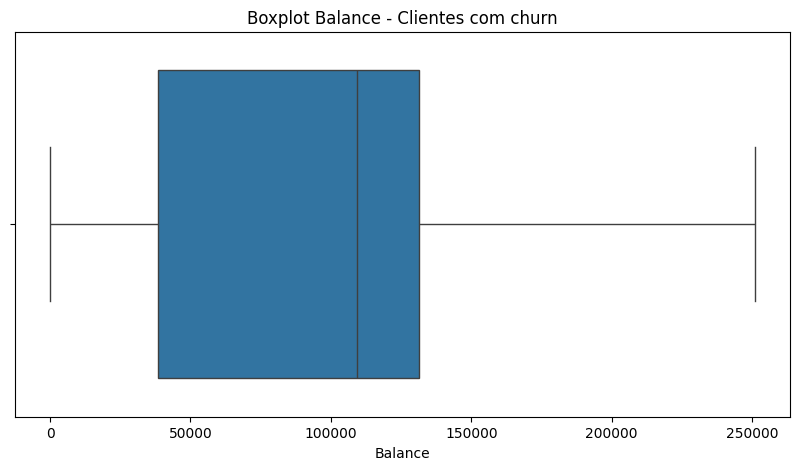

In [55]:
boxplot(churn_df, 'Balance', 'Clientes com churn')

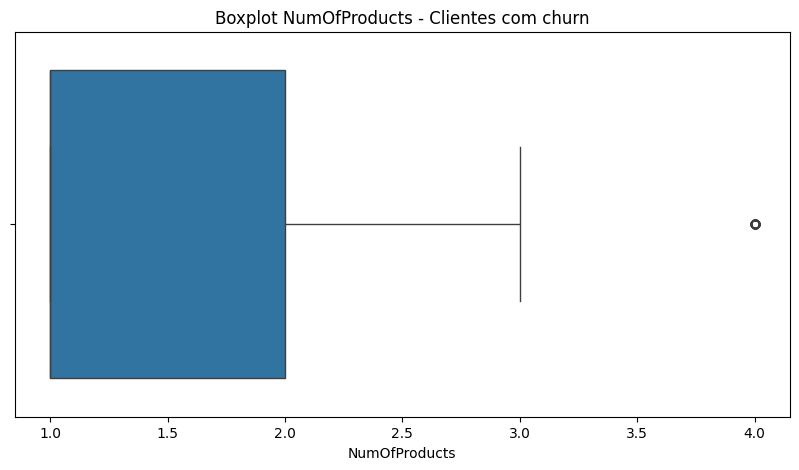

In [56]:
boxplot(churn_df, 'NumOfProducts', 'Clientes com churn')

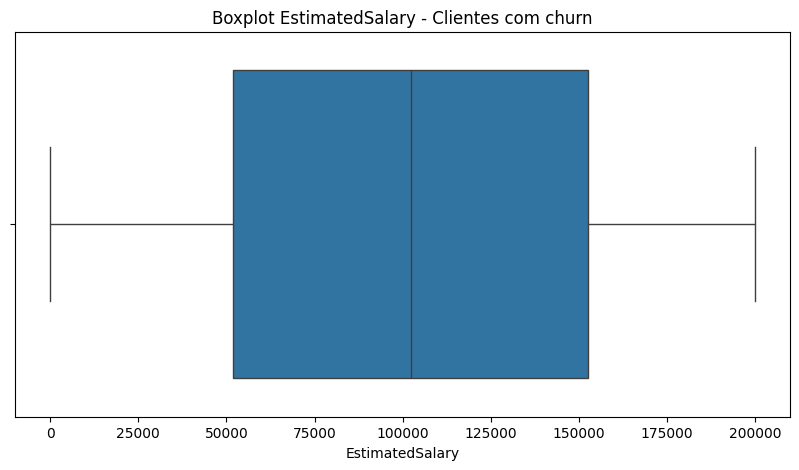

In [57]:
boxplot(churn_df, 'EstimatedSalary', 'Clientes com churn')